In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.patches import Rectangle
import seaborn as sns
%matplotlib inline
sns.set_style("white")
sns.set_context("paper", font_scale=1.4)

In [2]:
data_df = pd.read_csv('raw-data.csv', index_col='eventID')
data_df.head()

,AfterInhMATRIX5,PrescaleMATRIX5,RawMATRIX4,RawTriggers,label
eventID,,,,,
430001,27094,12,1598521,10759045,2
430002,34901,14,1670878,11813291,3
430003,36317,15,1675869,12002554,3
430004,34088,14,1637602,11564482,3
430005,27489,12,1587623,10627391,4


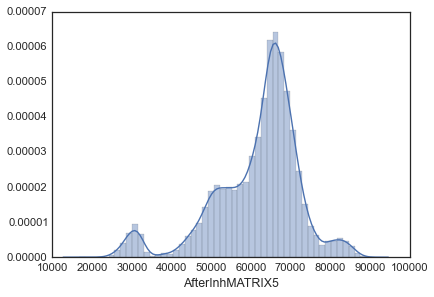

In [3]:
feature = "AfterInhMATRIX5"
sns.distplot(data_df.query("label == 1")[feature])

## We'll be plotting over ranges of eventID

Get details of the eventID's we're working with.

In [4]:
minEventID = data_df.index.values[0]
maxEventID = data_df.index.values[-1]
nTotalEvents = maxEventID - minEventID
print ("Event Range: %d - %d (%d events)" %
       (minEventID, maxEventID, nTotalEvents))

Event Range: 430001 - 482555 (52554 events)


In [5]:
# Define animation parameters
frames = 60
step = int((nTotalEvents)/frames)
print ("#Frames: %d\nStep Size: %d events" % (frames, step))

#Frames: 60
Step Size: 875 events


In [6]:
def my_frame(nframe):
    """Creates a single frame for our animated plot."""
    
    # Clear the axes
    plt.cla()
    # Get step amount
    my_step = step
    # Calculate the eventID range from the frame number
    tmp_minEventID = minEventID + (nframe * my_step)
    # Define your max eventID.
    tmp_maxEventID = tmp_minEventID + my_step
    # Get desired slice of the data
    my_slice = data_df.query("label == 1 and "
                             "eventID >= @tmp_minEventID and "
                             "eventID < @tmp_maxEventID")[feature]
    if len(my_slice)!=0:
        # Plot the distribution
        ax = sns.distplot(my_slice)
        # Make sure you always use the same x-range
        plt.xlim([10000,100000])
        # Y-ticks will be different per normalized distplot
        plt.yticks(visible=False)
        ax.yaxis.grid(False)
        # Label with the eventID range plotted
        plt.title('eventID: [%d, %d)' %
                  (tmp_minEventID, tmp_maxEventID))

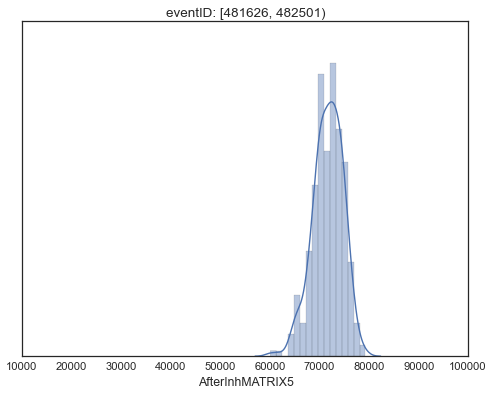

In [7]:
fps = 4
fig = plt.figure(figsize=(8,6));
anim = animation.FuncAnimation(fig, my_frame,
                               frames=frames);
anim.save(('figures/%dfps.gif' % fps), 
          writer='imagemagick', fps=fps);

<img src='figures/4fps.gif'>

## Let's add the means for the Gaussians we fit earlier

Just for kicks, to see how they line up with this progression.

In [8]:
# Optimized values from scipy.optimize.curve_fit
#    (from previous post)
optim_means = [30367, 53071, 66494, 80549]
optim_amp = [7.46e-06, 1.99e-05, 5.85e-05, 4.70e-06]
# Normalize the list like so
norm_amp = [i/sum(optim_amp) for i in optim_amp]

In [9]:
def my_frame(nframe):
    """Creates a single frame for our animated plot."""
    
    # Clear the axes
    plt.cla()
    # Get step amount
    my_step = step
    # Calculate the eventID range from the frame number
    tmp_minEventID = minEventID + (nframe * my_step)
    # Define your max eventID.
    tmp_maxEventID = tmp_minEventID + my_step
    # Get desired slice of the data
    my_slice = data_df.query("label == 1 and "
                             "eventID >= @tmp_minEventID and "
                             "eventID < @tmp_maxEventID")[feature]
    if len(my_slice)!=0:
        # Plot the distribution
        ax = sns.distplot(my_slice)
        ###### **NEW** ######
        #Add lines for the Gaussian means we fitted
        ylim = ax.get_ylim()
        for mean, amp in zip(optim_means, norm_amp):
            plt.vlines(mean, 0.0, amp*ylim[1], color='black',
                       linestyles='--', lw=2)
        #####################
        # Make sure you always use the same x-range
        plt.xlim([10000,100000])
        # Y-ticks will be different per normalized distplot
        plt.yticks(visible=False)
        ax.yaxis.grid(False)
        # Label with the eventID range plotted
        plt.title('eventID: [%d, %d)' %
                  (tmp_minEventID, tmp_maxEventID))

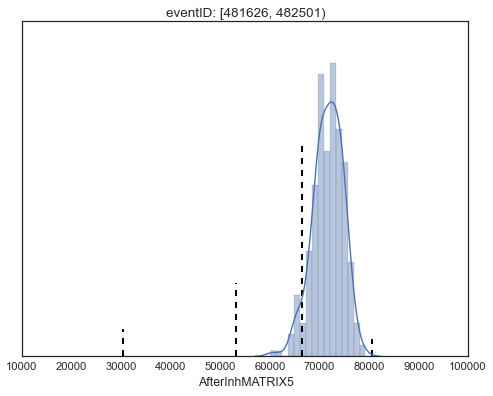

In [10]:
fps = 4
fig = plt.figure(figsize=(8,6));
anim = animation.FuncAnimation(fig, my_frame,
                               frames=frames);
anim.save(('figures/%dfps_means.gif' % fps),
          writer='imagemagick', fps=fps);

## Smoothing out the animations

You can smooth out the animation by:

* Keep the step size the same
* Increase the chunk of events you're looking at by some factor N

This allows that, for each step transition, only only 1/Nth of the data introduced is removed and added

In [22]:
def my_frame(nframe):
    """Creates a single frame for our animated plot."""
    
    # Clear the axes
    plt.cla()
    # Get step amount
    my_step = step
    # Calculate the eventID range from the frame number
    tmp_minEventID = minEventID + (nframe * my_step)
    ###### **NEW** ######
    # Define your max eventID. You can smooth things out
    #   by increasing this by some factor of step size
    N_factor = 3
    tmp_maxEventID = tmp_minEventID + (N_factor*my_step)
    #####################
    # Get desired slice of the data
    my_slice = data_df.query("label == 1 and "
                             "eventID >= @tmp_minEventID and "
                             "eventID < @tmp_maxEventID")[feature]
    if len(my_slice)!=0:
        # Plot the distribution
        ax = sns.distplot(my_slice)
        # Add lines for the Gaussian means we fitted
        ylim = ax.get_ylim()
        for mean, amp in zip(optim_means, norm_amp):
            plt.vlines(mean, 0.0, amp*ylim[1], color='black',
                       linestyles='--', lw=2)
        # Make sure you always use the same x-range
        plt.xlim([10000,100000])
        # Y-ticks will be different per normalized distplot
        plt.yticks(visible=False)
        ax.yaxis.grid(False)
        # Label with the eventID range plotted
        plt.title('eventID: [%d, %d)' %
                  (tmp_minEventID, tmp_maxEventID))

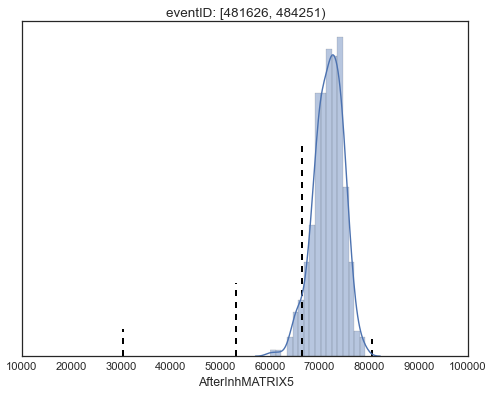

In [23]:
fps = 4
fig = plt.figure(figsize=(8,6));
anim = animation.FuncAnimation(fig, my_frame,
                               frames=frames);
anim.save(('figures/%dfps_means_smooth.gif' % fps),
          writer='imagemagick', fps=fps);

## Add progress bar

It's difficult to watch the eventID values.

Help out the viewer by adding a progress bar. Allows one to, at the least, see when .gif loops.

* Create empty Rectangle at the top
* Create a filled in Rectangle to represent the data viewed

In [13]:
def my_frame(nframe):
    """Creates a single frame for our animated plot."""
    
    # Clear the axes
    plt.cla()
    # Get step amount
    my_step = step
    # Calculate the eventID range from the frame number
    tmp_minEventID = minEventID + (nframe * my_step)
    # Define your max eventID. You can smooth things out
    #   by increasing this by some factor of step size
    N_factor = 3
    tmp_maxEventID = tmp_minEventID + (N_factor*my_step)
    # Get some figures for where we are in the whose set
    nEvents = tmp_maxEventID - tmp_minEventID
    prcnt_events = (nEvents / float(nTotalEvents))
    prcnt_total = (tmp_maxEventID - minEventID) / float(nTotalEvents)
    # Get desired slice of the data
    my_slice = data_df.query("label == 1 and "
                             "eventID >= @tmp_minEventID and "
                             "eventID < @tmp_maxEventID")[feature]
    if len(my_slice)!=0:
        # Plot the distribution
        ax = sns.distplot(my_slice)
        # Add lines for the Gaussian means we fitted
        ylim = ax.get_ylim()
        for mean, amp in zip(optim_means, norm_amp):
            plt.vlines(mean, 0.0, amp*ylim[1], color='black',
                       linestyles='--', lw=2)
        ###### **NEW** ######
        # Add empty progress bar rectangle
        r1 = Rectangle((12000, 0.920*ylim[1]),    # Lower left (x,y)
                       86000,                     # Width
                       0.06*(ylim[1]-ylim[0]),    # Height
                       facecolor="grey", alpha=0.9, fill=False)
        ax.add_patch(r1)
        # Add rectangle to indicate data location on display
        r2 = Rectangle((12500+(prcnt_total*78000), 0.925*ylim[1]),
                       78000*prcnt_events,    
                       0.05*(ylim[1]-ylim[0]),
                       facecolor="grey", alpha=0.7, fill=True)
        ax.add_patch(r2)
        #####################
        # Make sure you always use the same x-range
        plt.xlim([10000,100000])
        # Y-ticks will be different per normalized distplot
        plt.yticks(visible=False)
        ax.yaxis.grid(False)
        # Label with the eventID range plotted
        plt.title('eventID: [%d, %d)' %
                  (tmp_minEventID, tmp_maxEventID))

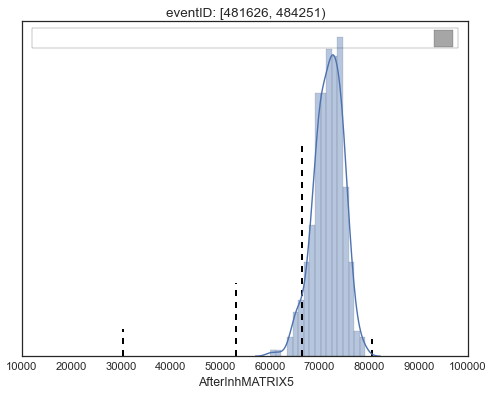

In [14]:
fps = 4
fig = plt.figure(figsize=(8,6));
anim = animation.FuncAnimation(fig, my_frame,
                               frames=frames);
anim.save(('figures/%dfps_means_smooth_progress.gif' % fps),
          writer='imagemagick', fps=fps);

## Adjust FPS

Now that you're done adding things, play around with FPS to see what looks best

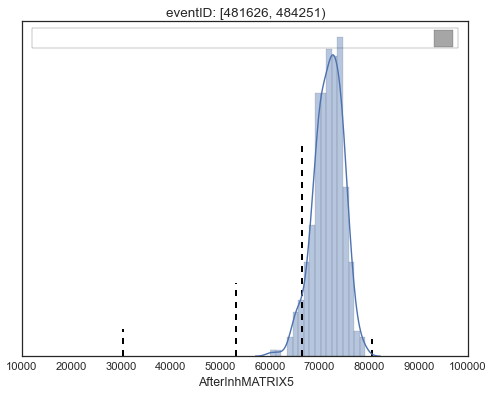

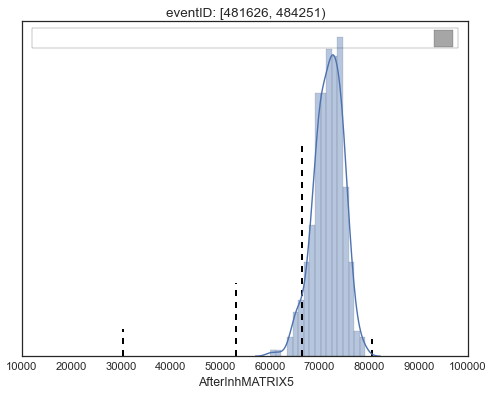

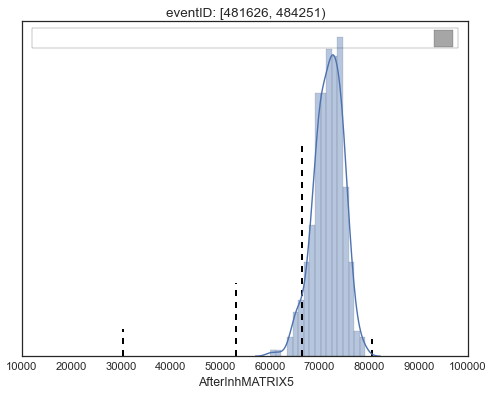

In [15]:
# Plot for various speeds
for fps in [1, 9, 16]:
    fig = plt.figure(figsize=(8,6))
    anim = animation.FuncAnimation(fig, my_frame,
                                   frames=frames);
    anim.save(('figures/%dfps_means_smooth_progress.gif' % fps),
              writer='imagemagick', fps=fps);

I think I like somewhere around 9fps, so I'll use that.

## Let's apply this to some different plots

Like, say if we wanted to get a feel for this time dependence across all categories. Does it effect them all the same?

In [18]:
def my_violin_frame(nframe):
    """Creates a single frame for our animated plot."""
    
    # Clear the axes
    plt.cla()
    # Get step amount
    my_step = step
    # Calculate the eventID range from the frame number
    tmp_minEventID = minEventID + (nframe * my_step)
    # Define your max eventID. You can smooth things out
    #   by increasing this by some factor of step size
    N_factor = 3
    tmp_maxEventID = tmp_minEventID + (N_factor*my_step)
    # Get some figures for where we are in the whose set
    nEvents = tmp_maxEventID - tmp_minEventID
    prcnt_events = (nEvents / float(nTotalEvents))
    prcnt_total = (tmp_maxEventID - minEventID) / float(nTotalEvents)
    
    # Get desired slice of the data
    my_slice = data_df.query("eventID >= @tmp_minEventID and "
                             "eventID < @tmp_maxEventID")
    if len(my_slice)!=0:
        # Plot the distribution
        ax = sns.violinplot(x='label', y=feature,
               data=my_slice.sort_values('label'),
               palette='muted')
    
        ylim = [10000,110000]
        plt.ylim(ylim)
    
        # Add empty progress bar rectangle
        r1 = Rectangle((0.1, 0.920*ylim[1]),    # Lower left (x,y)
                       6,                       # Width
                       0.06*(ylim[1]-ylim[0]),  # Height
                       facecolor="grey", alpha=0.9, fill=False)
        ax.add_patch(r1)
        # Add rectangle to indicate data location on display
        r2 = Rectangle((0.11+(prcnt_total*5.5), 0.925*ylim[1]),
                       5.5*prcnt_events,    
                       0.05*(ylim[1]-ylim[0]),
                       facecolor="grey", alpha=0.7, fill=True)
        ax.add_patch(r2)
    
        # Label with the eventID range plotted
        plt.title('eventID: [%d, %d)' %
                  (tmp_minEventID, tmp_maxEventID))

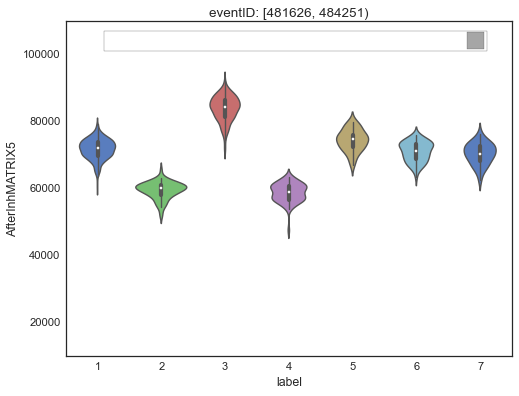

In [19]:
fps = 9
fig = plt.figure(figsize=(8,6))
anim = animation.FuncAnimation(fig, my_violin_frame,
                               frames=frames);
anim.save(('figures/%dfps_violin.gif' % fps),
          writer='imagemagick', fps=fps);